# TORBIDITA'
### Questo script è pensato per aprire, analizzare e modificare i file sonda ARPAL


In [ ]:
# Per prima cosa dobbiamo importre alcune librerie che ci serviranno 
#import libraries

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as cm
import numpy.linalg as la
import math
import scipy.linalg
from scipy.interpolate import griddata
import pandas as pd
import datetime
import pandas_profiling
from numpy import asarray
from numpy import savetxt

1 - Apriamo il file

In [ ]:
# il nome del file da aprire cambia ogni volta, lo salvo per comodità ,come 'file_name' per non doverlo ripetere

file_name = 'samples_positivi.csv'

In [ ]:
#apro il file csv con il comando pd.read.csv
data_all = pd.read_csv(file_name, delimiter=';', parse_dates=["date"]) 
nK = data_all.shape[0]
DK = data_all.shape[1]
print('numero variabili=', DK)
print('numero records =', nK)

numero variabili= 6
numero records = 499


In [ ]:
#per vedere i dati basta chiamare il dataframe 
data_all

,station,date,LAT_WGS84,LONG_WGS84,depth,measure
0,SPNIS1,2015-08-06,44.07094,9.85687,11.0,1.160
1,SPNIS2,2015-08-06,44.06862,9.85907,11.0,1.300
2,MAR6F3,2015-08-06,44.02334,9.96460,16.5,1.440
3,MAR6F2,2015-08-06,44.00922,9.99266,16.5,2.750
4,MAR6F1,2015-08-06,44.02369,10.02216,13.0,1.600
...,...,...,...,...,...,...
494,SPEZ6A2,2020-12-22,44.07150,9.84330,12.0,1.950
495,SPEZ6A3,2020-12-22,44.07730,9.85270,12.0,1.850
496,MAR6F1,2021-01-08,44.02369,10.02216,13.0,5.468
497,MAR6F2,2021-01-08,44.00922,9.99266,16.5,6.169


In [ ]:
#Posso fare alcuni controlli sui dati direttamente da qui, ad esempio verificare che non ci siano valori NaN o negativi
# Nel caso elimino la riga corrispondente
data_all = data_all.dropna(subset=["measure"])
data_all = data_all[data_all['measure'] >= 0]

#Controllo le nuove dimensioni del mio DataBase modificato
n2 = data_all.shape[0]
D2 = data_all.shape[1]

eliminati = nK-n2
print('il nuovo numero di records è', n2)
print('il numero di records eliminati è', eliminati)

NameError: ignored

In [ ]:
#alcune analisi statisctiche dei dati
data_all.describe() 

,LAT_WGS84,LONG_WGS84,depth,measure
count,499.000000,499.000000,499.000000,499.000000
mean,44.118018,9.170154,74.118236,1.539986
std,0.175720,0.760042,207.526429,1.519459
min,43.775402,7.633098,3.000000,0.100000
25%,44.023690,8.514779,11.000000,0.465000
50%,44.072500,9.424517,23.000000,0.991000
75%,44.262294,9.859070,50.000000,2.000000
max,44.425979,10.022160,1427.000000,9.819000


Text(0.5, 1.0, 'torbidità per stazione')

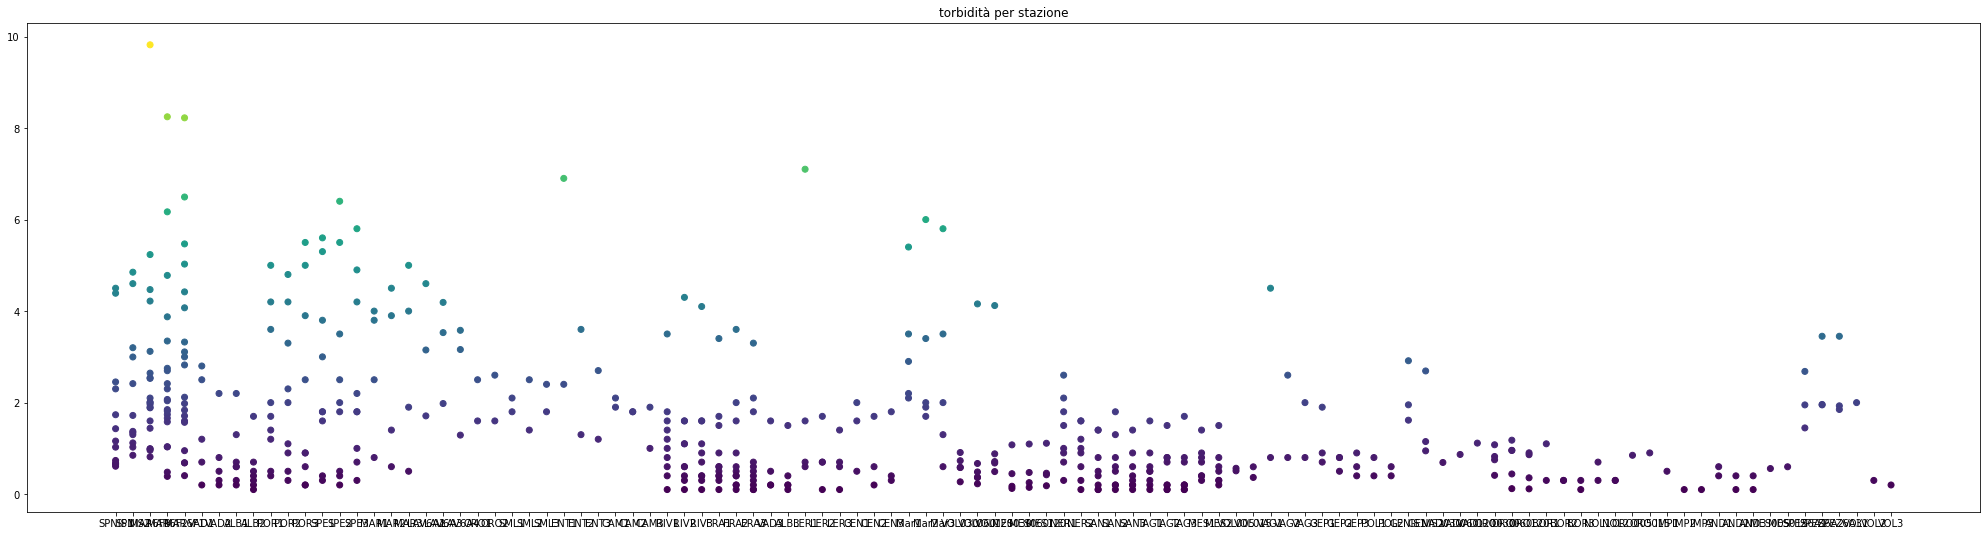

In [ ]:
X = data_all
X1 = X.to_numpy()
plt.figure(figsize=(35,9))
plt.subplot(111)
plt.scatter(X1[:,0], X1[:, 5], c=X1[:, 5])
plt.title("torbidità per stazione")

#il colore dei punti dipende dal valore di torbidità